#                              Mini Project 1-Stock Market Analysis Using Python 

Business Scenario: Data Science extracts meaningful insight from chunks of raw data, which is useful to different business segments for planning their future course of action. Finance is probably one of the first to catch on to this trend with a rise in the penetration of analytics into many aspects of our lives. Here, we will analyze data from the stock market for some technology stocks such as Apple, Google, Amazon, and Microsoft.

Objective: Use Python libraries such as Pandas, Seaborn, and Matplotlib to extract and analyze the information, visualize it, and look at different ways to analyze the risk of a stock, based on its performance history.

About the Data: The stocks we have chosen are from various industries and market caps namely,

•Apple

•Google

•Microsoft

•Amazon

For the start, we shall investigate the Amazon stock individually and then move on to the combined analysis.

To know more about stocks and their data please visit the below link:https://in.finance.yahoo.com/

The following tasks are to be performed:

•Read the Data from Yahoo finance website directly.

•Perform cleaning.

•What was the change in stock price over time?

•Visualize the change in a stock’s volume being traded, over time?

•What was the moving average of various stocks?

•What was the daily return average of a stock?

•Add a new column ‘Trend’ whose values are based on the 'Daily Return'.

•Visualize trend frequency through a Pie Chart.

•What was the correlation between the daily returns of different stocks?


In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf
%matplotlib inline

# Reading the Data from Yahoo finance website directly

In [2]:
#Reading the data from Yahoo Finance for Amazon,Microsoft,Google,Apple
amazon = yf.download('AMZN', start='2022-01-01', end='2023-01-01')
microsoft = yf.download('MSFT', start='2022-01-01', end='2023-01-01')
google = yf.download('GOOG', start='2022-01-01', end='2023-01-01')
apple = yf.download('AAPL', start='2022-01-01', end='2023-01-01')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
#Checking amazon data
amazon.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,126.318080,128.419815,123.914148,126.098819,126.098819,7.608070e+07
std,23.918480,24.051600,23.701656,23.904315,23.904315,3.402541e+07
min,82.800003,83.480003,81.690002,81.820000,81.820000,3.508860e+07
25%,108.330498,112.386250,106.459999,108.889500,108.889500,5.508695e+07
50%,122.699997,124.400002,120.629997,122.769997,122.769997,6.653800e+07
75%,146.570000,149.645004,143.752251,145.857506,145.857506,8.508390e+07
max,170.438004,171.399994,167.868500,170.404495,170.404495,2.726620e+08


In [4]:
 amazon.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000
2022-01-04,170.438004,171.399994,166.349503,167.522003,167.522003,70726000
2022-01-05,166.882996,167.126495,164.356995,164.356995,164.356995,64302000
2022-01-06,163.450500,164.800003,161.936996,163.253998,163.253998,51958000
2022-01-07,163.839005,165.243500,162.031006,162.554001,162.554001,46606000
2022-01-10,160.585495,161.661499,156.304504,161.485992,161.485992,87798000
2022-01-11,161.500000,166.350006,160.701508,165.362000,165.362000,62806000
2022-01-12,166.574997,166.878006,164.417007,165.207001,165.207001,50030000
2022-01-13,165.250504,166.221497,161.091003,161.214005,161.214005,52188000


# Cleaning the data

Adding a new column named Company in each Dataframe

In [5]:
apple['Company'] = 'AAPL'
google['Company'] = 'GOOG'
amazon['Company'] = 'AMZN'
microsoft['Company'] = 'MSFT'

In [6]:
df=pd.concat([apple,amazon,google,microsoft])

In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.190979,104487900,AAPL
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.904053,99310400,AAPL
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.171844,94537600,AAPL
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.281036,96904000,AAPL
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.449310,86709100,AAPL


In [8]:
df.to_csv('Stocks.csv',index=False)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2022-01-03 to 2022-12-30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1004 non-null   float64
 1   High       1004 non-null   float64
 2   Low        1004 non-null   float64
 3   Close      1004 non-null   float64
 4   Adj Close  1004 non-null   float64
 5   Volume     1004 non-null   int64  
 6   Company    1004 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 62.8+ KB


Checking for null values

In [10]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Company      0
dtype: int64

Checking for dulicates values

In [11]:
df.duplicated().sum()

0

# What was the change in stock price over time?

In [12]:
#Here I used pandas pct_change() method which returns a DataFrame with the percentage difference between the values for each row and the previous row
df['Daily Change'] = df['Adj Close'].pct_change()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Company,Daily Change
Date,,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.190979,104487900,AAPL,NaN
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.904053,99310400,AAPL,-0.012692
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.171844,94537600,AAPL,-0.026600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.281036,96904000,AAPL,-0.016693
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.449310,86709100,AAPL,0.000988


Price trend of individual stocks

<Axes: title={'center': "Amazon's Stock Trend"}, xlabel='Date'>

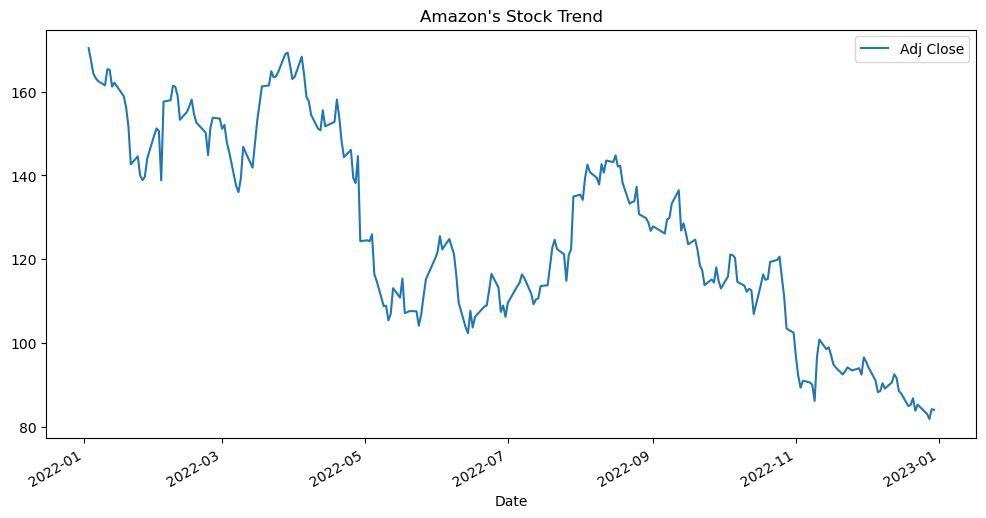

In [13]:
amazon['Adj Close'].plot(legend=True,figsize=(12,6),title = "Amazon's Stock Trend")

<Axes: title={'center': "Apple's Stock Trend"}, xlabel='Date'>

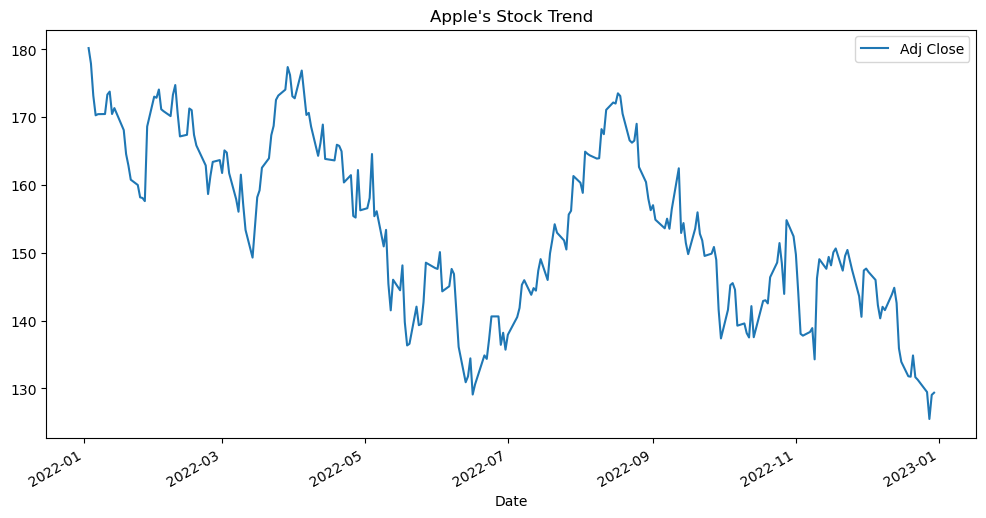

In [14]:
apple['Adj Close'].plot(legend=True,figsize=(12,6),title = "Apple's Stock Trend")

<Axes: title={'center': "Google's Stock Trend"}, xlabel='Date'>

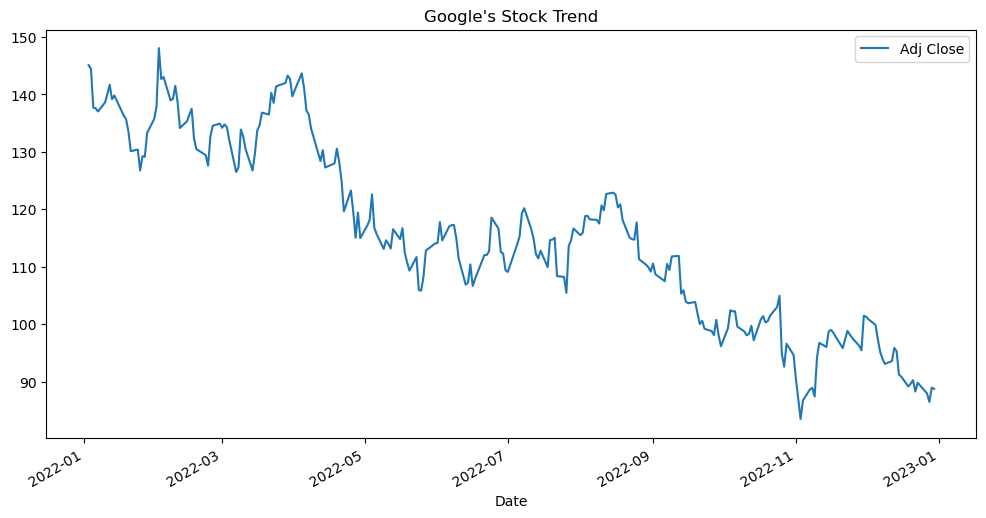

In [15]:
google['Adj Close'].plot(legend=True,figsize=(12,6),title = "Google's Stock Trend")

<Axes: title={'center': "Microsoft's Stock Trend"}, xlabel='Date'>

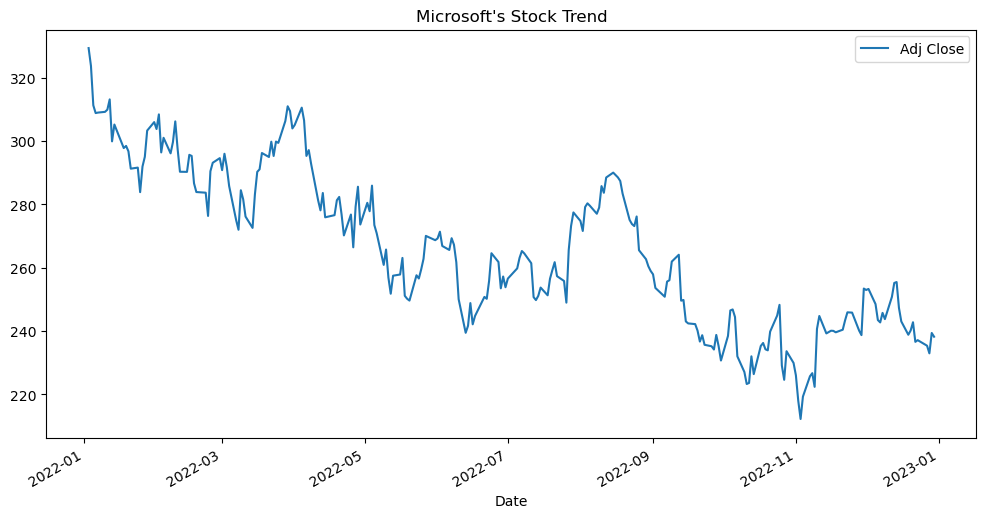

In [16]:
microsoft['Adj Close'].plot(legend=True,figsize=(12,6),title = "Microsoft's Stock Trend")

# Visualize the change in a stock’s volume being traded, over time?

<Axes: xlabel='Date'>

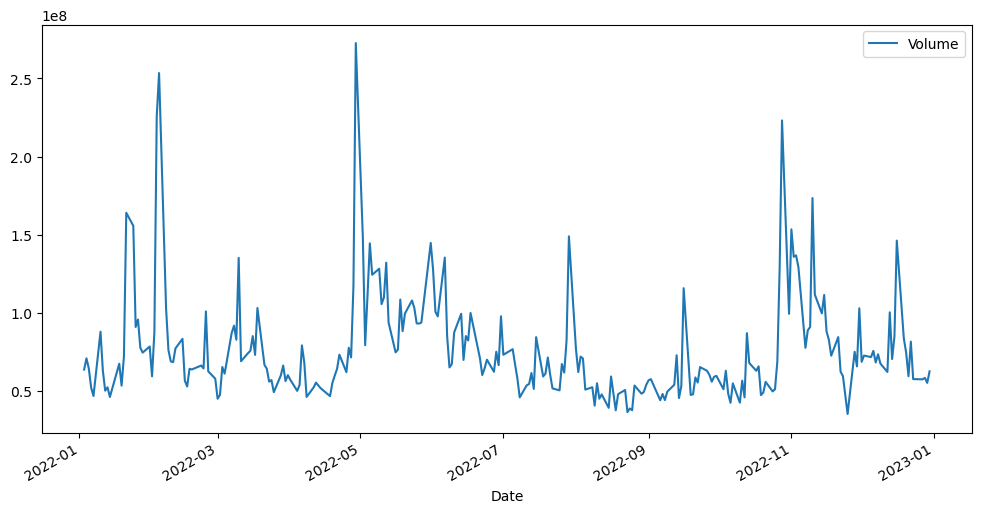

In [17]:
amazon['Volume'].plot(legend=True,figsize=(12,6))

<Axes: xlabel='Date'>

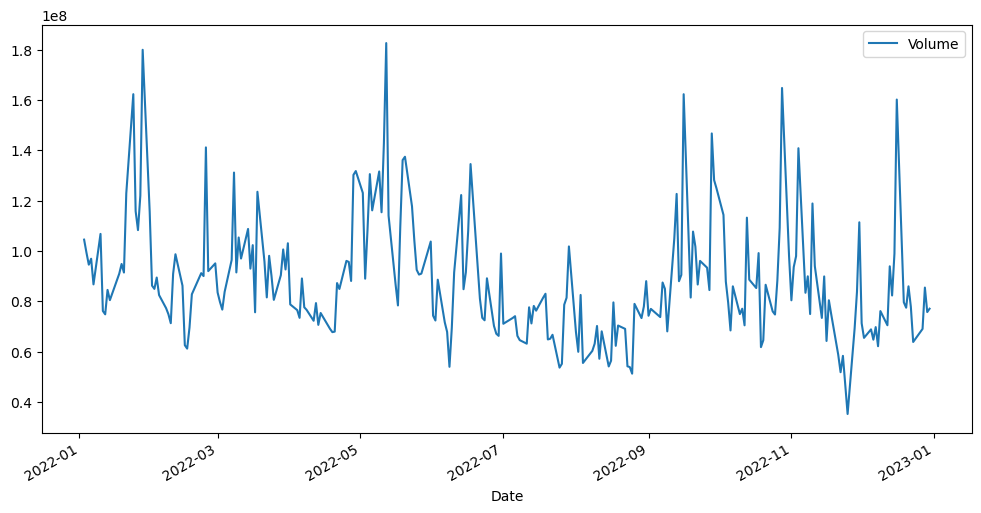

In [18]:
apple['Volume'].plot(legend=True,figsize=(12,6))

<Axes: xlabel='Date'>

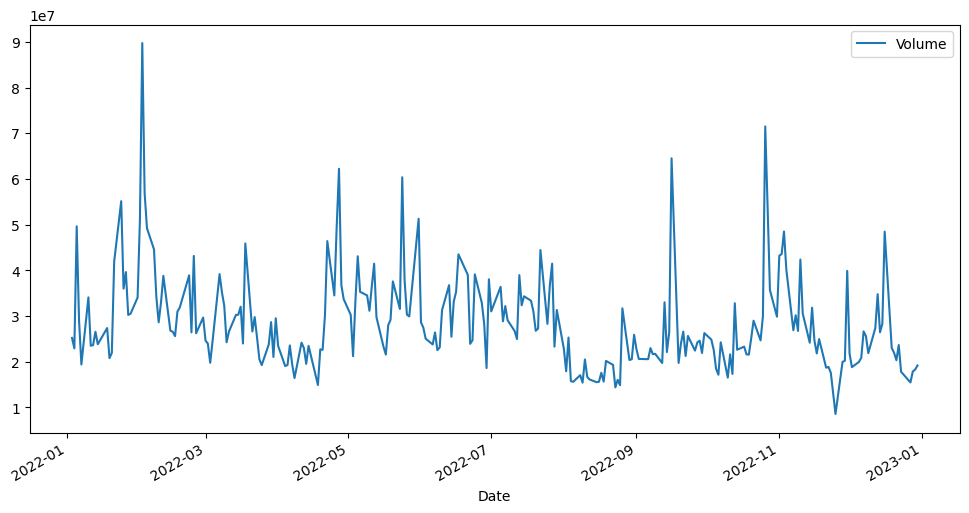

In [19]:
google['Volume'].plot(legend=True,figsize=(12,6))

<Axes: xlabel='Date'>

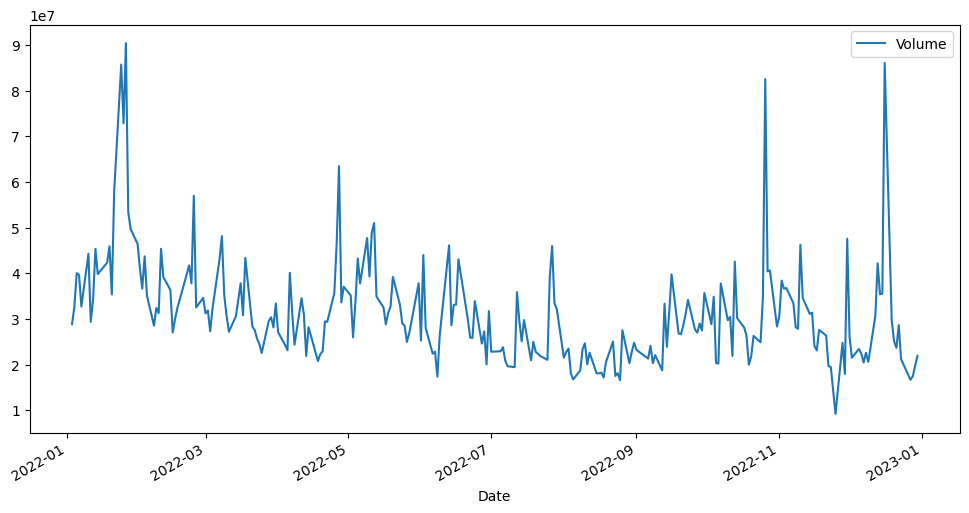

In [20]:
microsoft['Volume'].plot(legend=True,figsize=(12,6))

# What was the moving average of various stocks?

In [21]:
# Here I calculated the moving average of 50 days and 200 days resectively
amazon['MA50'] = amazon['Adj Close'].rolling(window=50).mean()
amazon['MA200'] = amazon['Adj Close'].rolling(window=200).mean()

In [22]:
amazon.tail()

,Open,High,Low,Close,Adj Close,Volume,Company,MA50,MA200
Date,,,,,,,,,
2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700,AMZN,96.9226,120.649780
2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000,AMZN,96.4454,120.337358
2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600,AMZN,95.8060,120.037193
2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,54995900,AMZN,95.1624,119.721260
2022-12-30,83.120003,84.050003,82.470001,84.000000,84.000000,62401200,AMZN,94.5410,119.375740


In [23]:
apple['MA50'] = apple['Adj Close'].rolling(window=50).mean()
apple['MA200'] = apple['Adj Close'].rolling(window=200).mean()

In [24]:
apple.tail()

,Open,High,Low,Close,Adj Close,Volume,Company,MA50,MA200
Date,,,,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900,AAPL,143.446967,151.122855
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477600,69007800,AAPL,143.285240,151.003349
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504539,85438400,AAPL,142.963928,150.884348
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.059387,75703700,AAPL,142.687070,150.760967
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.378006,77034200,AAPL,142.414399,150.616875


In [25]:
google['MA50'] = google['Adj Close'].rolling(window=50).mean()
google['MA200'] = google['Adj Close'].rolling(window=200).mean()

In [26]:
google.tail()

,Open,High,Low,Close,Adj Close,Volume,Company,MA50,MA200
Date,,,,,,,,,
2022-12-23,87.620003,90.099998,87.620003,89.809998,89.809998,17815000,GOOG,95.1986,110.950400
2022-12-27,89.309998,89.500000,87.535004,87.930000,87.930000,15470900,GOOG,95.0136,110.737673
2022-12-28,87.500000,88.519997,86.370003,86.459999,86.459999,17879600,GOOG,94.7272,110.536268
2022-12-29,87.029999,89.364998,86.989998,88.949997,88.949997,18280700,GOOG,94.4784,110.332715
2022-12-30,87.364998,88.830002,87.029999,88.730003,88.730003,19190300,GOOG,94.2472,110.107912


In [27]:
microsoft['MA50'] = microsoft['Adj Close'].rolling(window=50).mean()
microsoft['MA200'] = microsoft['Adj Close'].rolling(window=200).mean()

In [28]:
microsoft.tail()

,Open,High,Low,Close,Adj Close,Volume,Company,MA50,MA200
Date,,,,,,,,,
2022-12-23,236.110001,238.869995,233.940002,238.729996,237.112076,21207000,MSFT,238.714056,259.043897
2022-12-27,238.699997,238.929993,235.830002,236.960007,235.354095,16688600,MSFT,238.893677,258.839870
2022-12-28,236.889999,239.720001,234.169998,234.529999,232.940552,17457100,MSFT,238.847344,258.641673
2022-12-29,235.649994,241.919998,235.649994,241.009995,239.376633,19770700,MSFT,238.910518,258.422853
2022-12-30,238.210007,239.960007,236.660004,239.820007,238.194717,21938500,MSFT,238.990067,258.162429


# What was the daily return average of a stock?

In [29]:
amazon['Daily Return']=amazon['Adj Close'].pct_change()

In [30]:
amazon['Daily Return'].tail()

Date
2022-12-23    0.017425
2022-12-27   -0.025924
2022-12-28   -0.014692
2022-12-29    0.028844
2022-12-30   -0.002138
Name: Daily Return, dtype: float64

<Axes: xlabel='Date'>

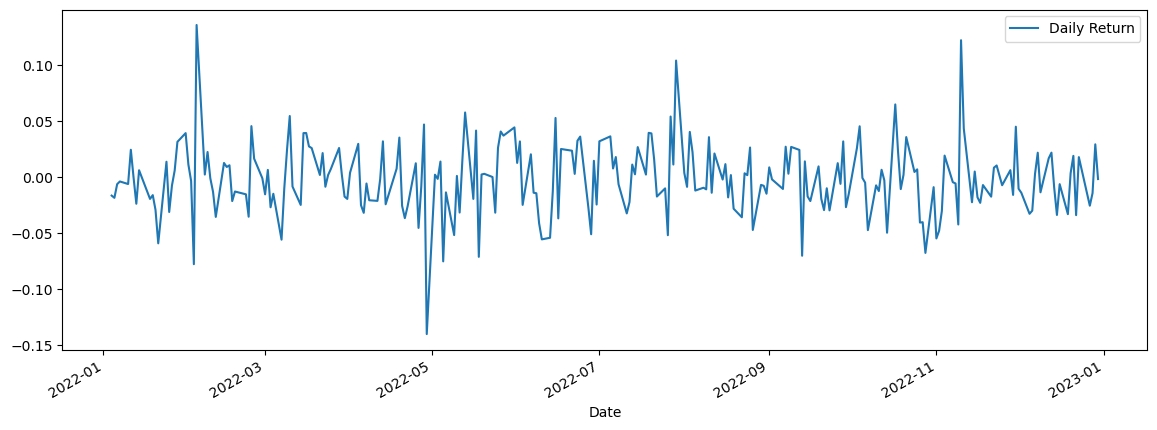

In [31]:
amazon['Daily Return'].plot(figsize=(14,5),legend=True)

C:\Users\King\AppData\Local\Temp\ipykernel_8868\3400013053.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amazon['Daily Return'].dropna(),bins=100,color='red',kde=False,ax=ax)


<Axes: xlabel='Daily Return'>

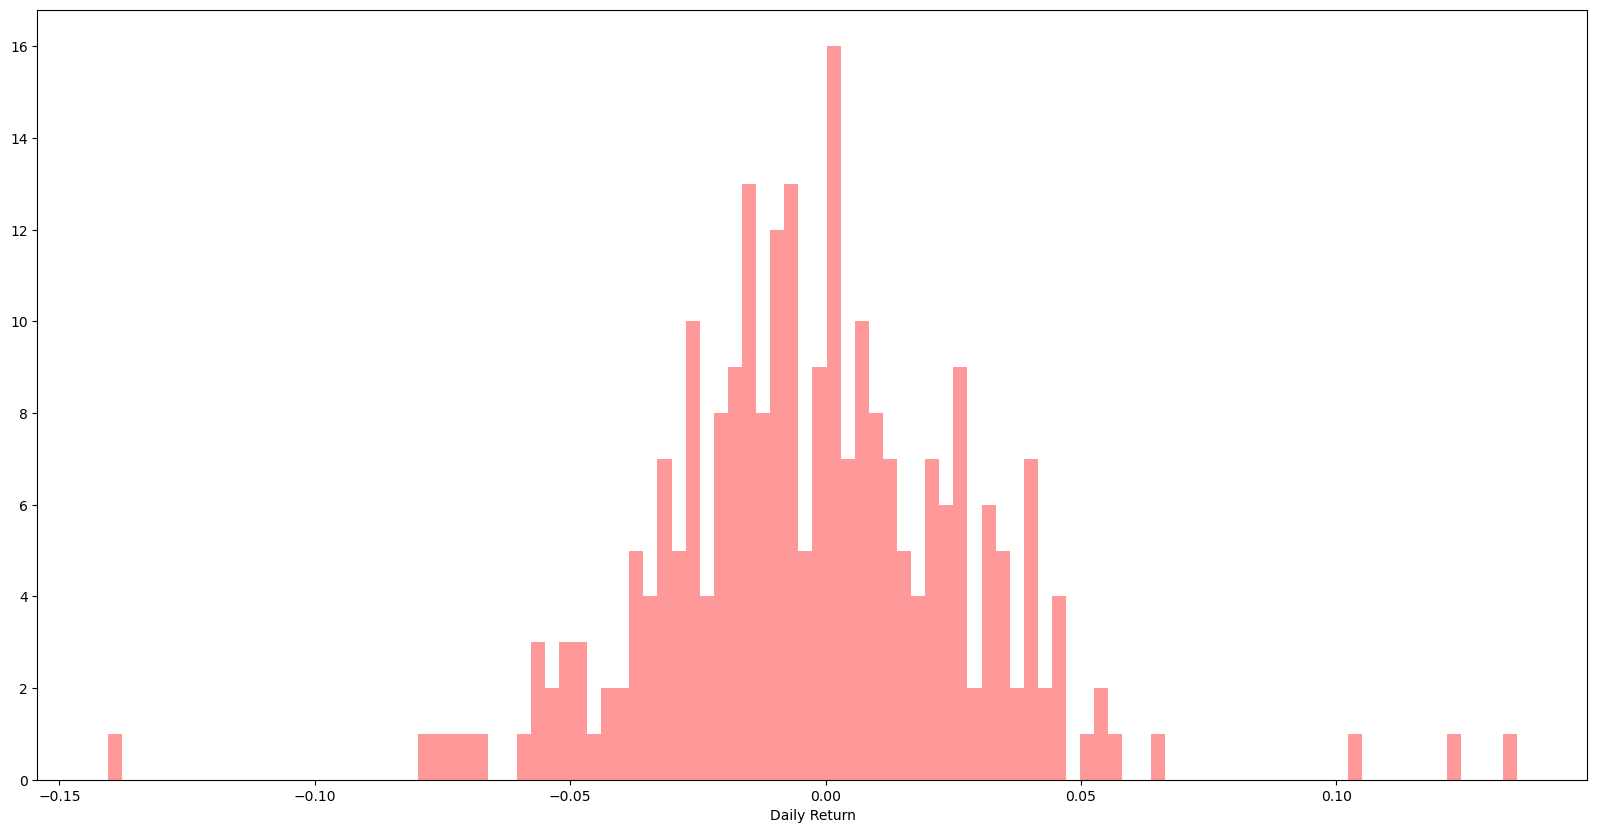

In [32]:
f,ax=plt.subplots(figsize=(20,10))
sns.distplot(amazon['Daily Return'].dropna(),bins=100,color='red',kde=False,ax=ax)

In [33]:
apple['Daily Return']=apple['Adj Close'].pct_change()

In [34]:
apple['Daily Return'].tail()

Date
2022-12-23   -0.002798
2022-12-27   -0.013878
2022-12-28   -0.030685
2022-12-29    0.028324
2022-12-30    0.002469
Name: Daily Return, dtype: float64

<Axes: xlabel='Date'>

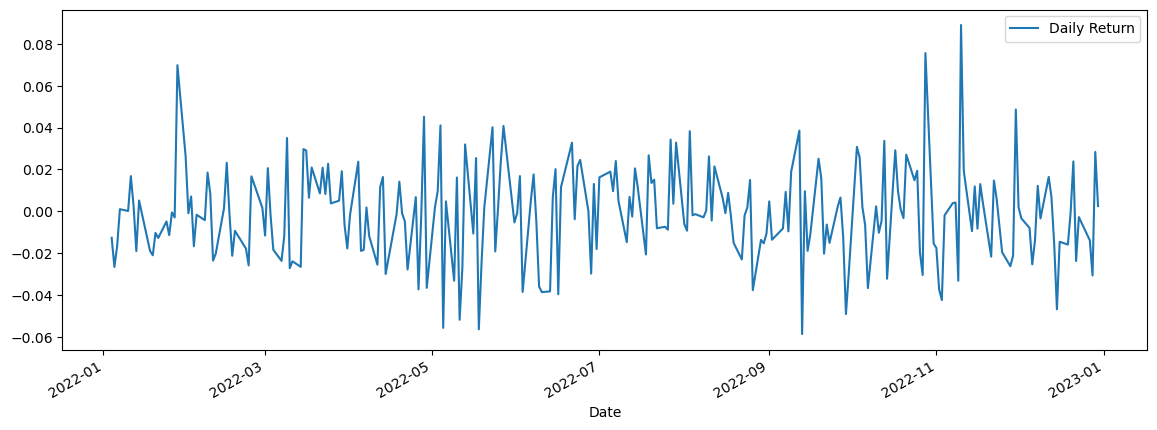

In [35]:
apple['Daily Return'].plot(figsize=(14,5),legend=True)

C:\Users\King\AppData\Local\Temp\ipykernel_8868\2227795025.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(apple['Daily Return'].dropna(),bins=100,color='red',kde=False,ax=ax)


<Axes: xlabel='Daily Return'>

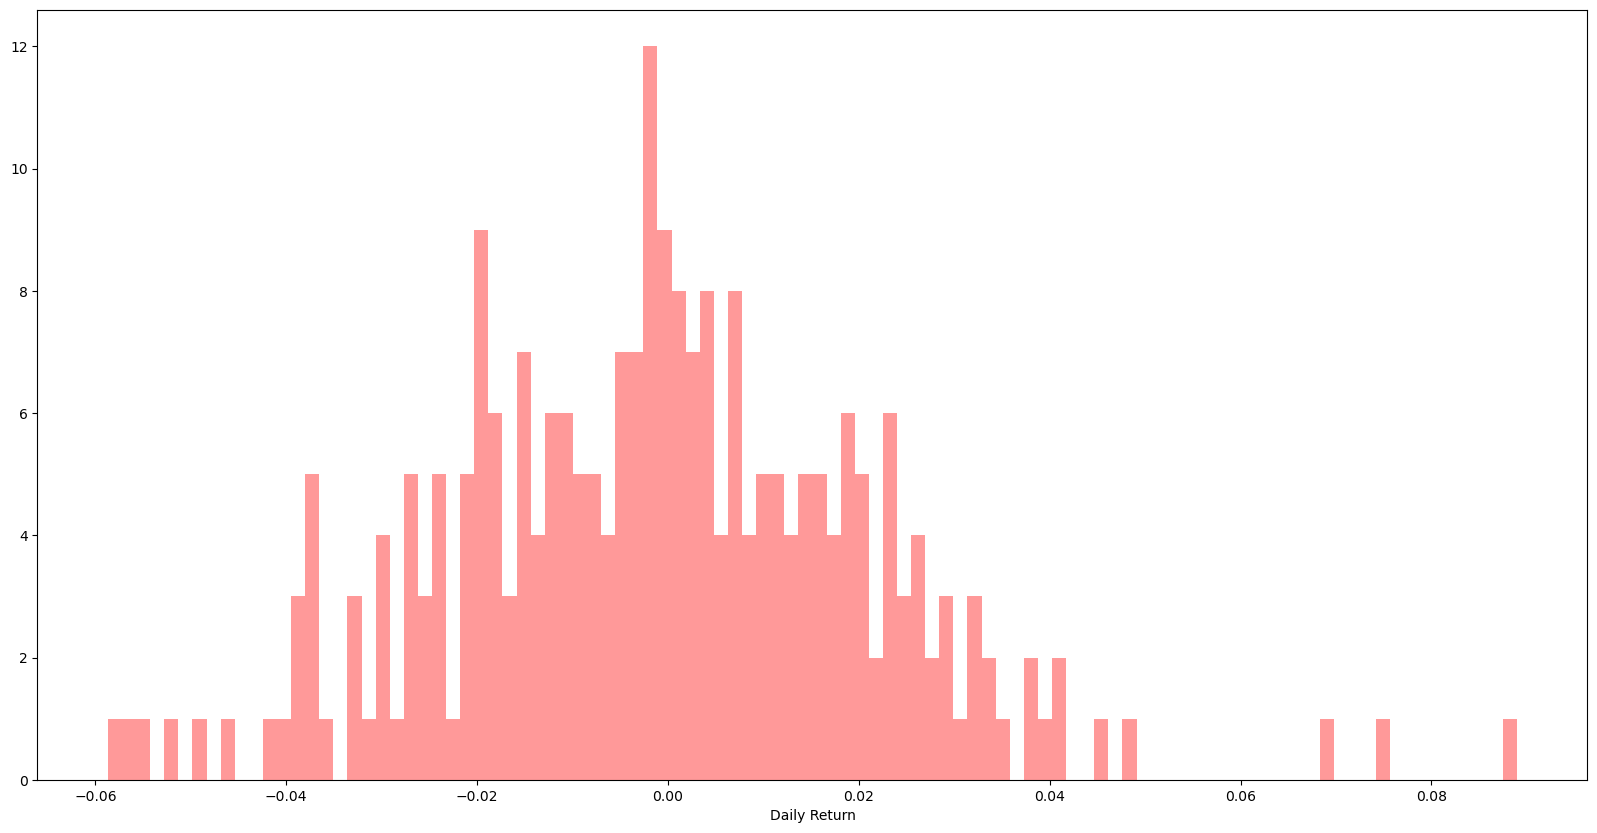

In [36]:
f,ax=plt.subplots(figsize=(20,10))
sns.distplot(apple['Daily Return'].dropna(),bins=100,color='red',kde=False,ax=ax)

In [37]:
google['Daily Return']=google['Adj Close'].pct_change()

In [38]:
google['Daily Return'].tail()

Date
2022-12-23    0.017562
2022-12-27   -0.020933
2022-12-28   -0.016718
2022-12-29    0.028799
2022-12-30   -0.002473
Name: Daily Return, dtype: float64

<Axes: xlabel='Date'>

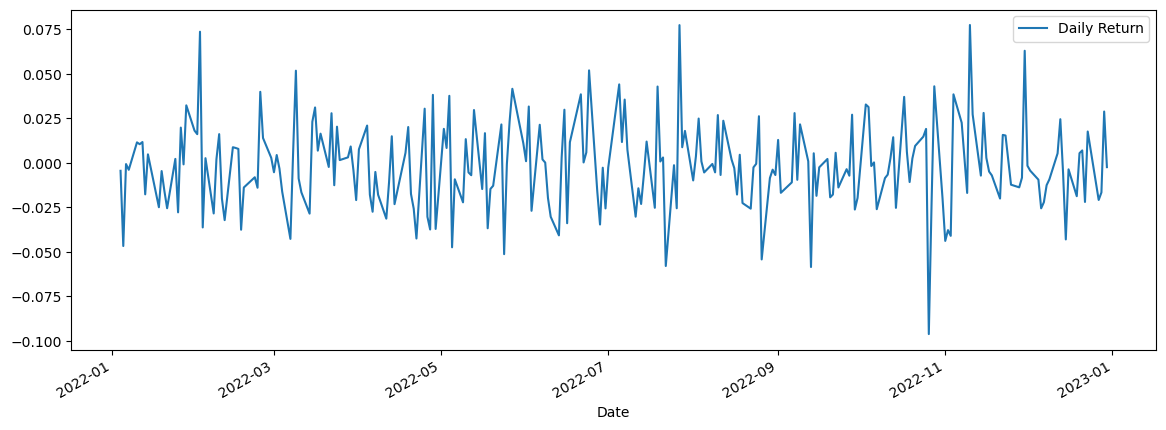

In [39]:
google['Daily Return'].plot(figsize=(14,5),legend=True)

C:\Users\King\AppData\Local\Temp\ipykernel_8868\3555546045.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(google['Daily Return'].dropna(),bins=100,color='red',kde=False,ax=ax)


<Axes: xlabel='Daily Return'>

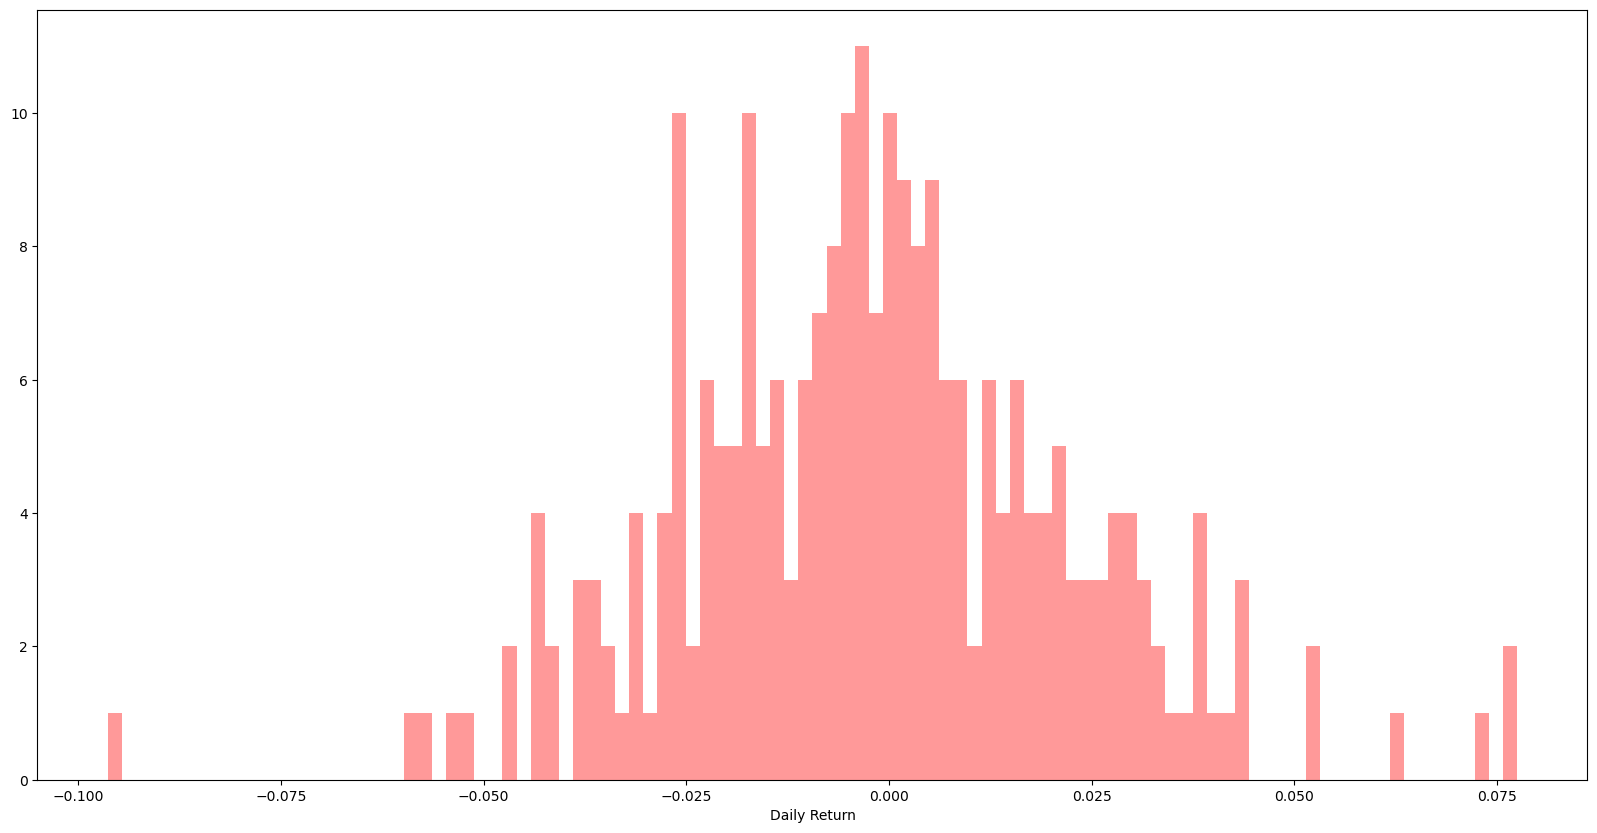

In [40]:
f,ax=plt.subplots(figsize=(20,10))
sns.distplot(google['Daily Return'].dropna(),bins=100,color='red',kde=False,ax=ax)

In [41]:
microsoft['Daily Return']=microsoft['Adj Close'].pct_change()

In [42]:
microsoft['Daily Return'].tail()

Date
2022-12-23    0.002267
2022-12-27   -0.007414
2022-12-28   -0.010255
2022-12-29    0.027630
2022-12-30   -0.004937
Name: Daily Return, dtype: float64

<Axes: xlabel='Date'>

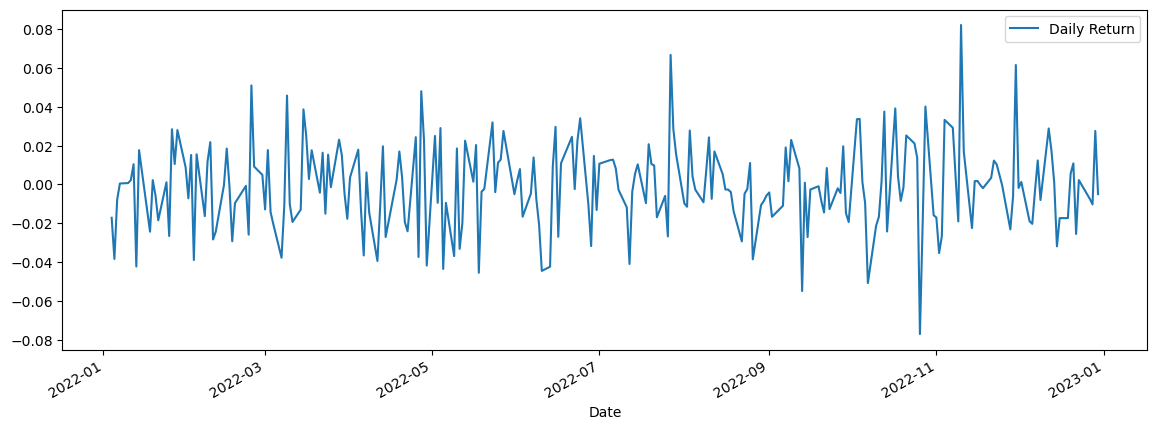

In [43]:
microsoft['Daily Return'].plot(figsize=(14,5),legend=True)

C:\Users\King\AppData\Local\Temp\ipykernel_8868\2477536902.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(microsoft['Daily Return'].dropna(),bins=100,color='red',kde=False,ax=ax)


<Axes: xlabel='Daily Return'>

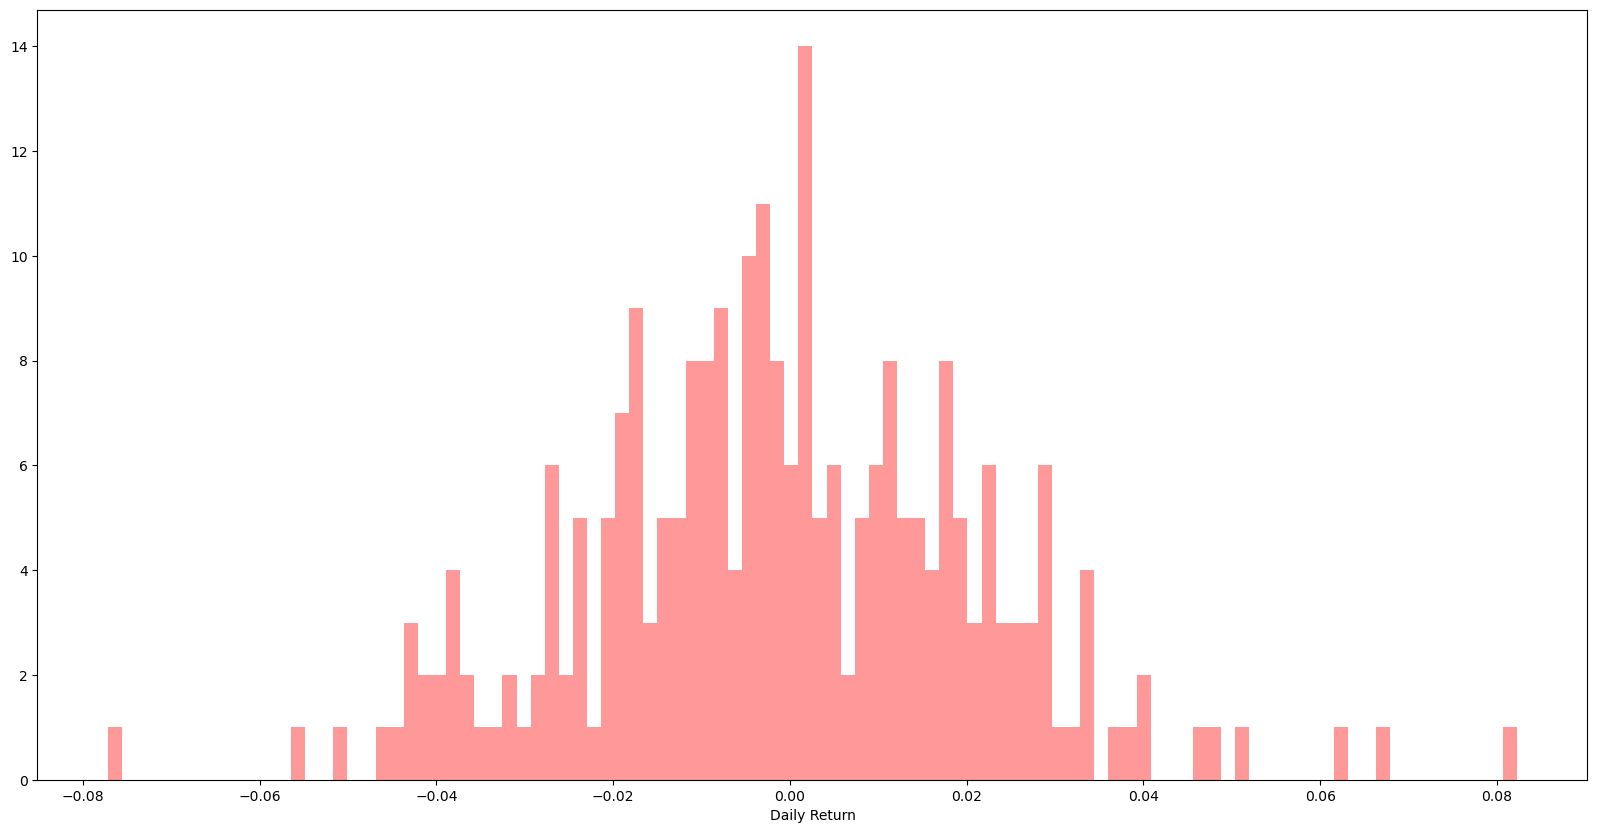

In [44]:
f,ax=plt.subplots(figsize=(20,10))
sns.distplot(microsoft['Daily Return'].dropna(),bins=100,color='red',kde=False,ax=ax)

# Add a new column ‘Trend’ whose values are based on the 'Daily Return'.

In [45]:
amazon['Trend'] = np.where(amazon['Daily Return'] > 0, 'Up', 'Down')
apple['Trend'] = np.where(apple['Daily Return'] > 0, 'Up', 'Down')
google['Trend'] = np.where(google['Daily Return'] > 0, 'Up', 'Down')
microsoft['Trend'] = np.where(microsoft['Daily Return'] > 0, 'Up', 'Down')

In [46]:
amazon.tail()

,Open,High,Low,Close,Adj Close,Volume,Company,MA50,MA200,Daily Return,Trend
Date,,,,,,,,,,,
2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700,AMZN,96.9226,120.649780,0.017425,Up
2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000,AMZN,96.4454,120.337358,-0.025924,Down
2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600,AMZN,95.8060,120.037193,-0.014692,Down
2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,54995900,AMZN,95.1624,119.721260,0.028844,Up
2022-12-30,83.120003,84.050003,82.470001,84.000000,84.000000,62401200,AMZN,94.5410,119.375740,-0.002138,Down


In [47]:
apple.tail()

,Open,High,Low,Close,Adj Close,Volume,Company,MA50,MA200,Daily Return,Trend
Date,,,,,,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900,AAPL,143.446967,151.122855,-0.002798,Down
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477600,69007800,AAPL,143.285240,151.003349,-0.013878,Down
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504539,85438400,AAPL,142.963928,150.884348,-0.030685,Down
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.059387,75703700,AAPL,142.687070,150.760967,0.028324,Up
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.378006,77034200,AAPL,142.414399,150.616875,0.002469,Up


In [48]:
google.tail()

,Open,High,Low,Close,Adj Close,Volume,Company,MA50,MA200,Daily Return,Trend
Date,,,,,,,,,,,
2022-12-23,87.620003,90.099998,87.620003,89.809998,89.809998,17815000,GOOG,95.1986,110.950400,0.017562,Up
2022-12-27,89.309998,89.500000,87.535004,87.930000,87.930000,15470900,GOOG,95.0136,110.737673,-0.020933,Down
2022-12-28,87.500000,88.519997,86.370003,86.459999,86.459999,17879600,GOOG,94.7272,110.536268,-0.016718,Down
2022-12-29,87.029999,89.364998,86.989998,88.949997,88.949997,18280700,GOOG,94.4784,110.332715,0.028799,Up
2022-12-30,87.364998,88.830002,87.029999,88.730003,88.730003,19190300,GOOG,94.2472,110.107912,-0.002473,Down


In [49]:
microsoft.tail()

,Open,High,Low,Close,Adj Close,Volume,Company,MA50,MA200,Daily Return,Trend
Date,,,,,,,,,,,
2022-12-23,236.110001,238.869995,233.940002,238.729996,237.112076,21207000,MSFT,238.714056,259.043897,0.002267,Up
2022-12-27,238.699997,238.929993,235.830002,236.960007,235.354095,16688600,MSFT,238.893677,258.839870,-0.007414,Down
2022-12-28,236.889999,239.720001,234.169998,234.529999,232.940552,17457100,MSFT,238.847344,258.641673,-0.010255,Down
2022-12-29,235.649994,241.919998,235.649994,241.009995,239.376633,19770700,MSFT,238.910518,258.422853,0.027630,Up
2022-12-30,238.210007,239.960007,236.660004,239.820007,238.194717,21938500,MSFT,238.990067,258.162429,-0.004937,Down


# Visualize trend frequency through a Pie Chart

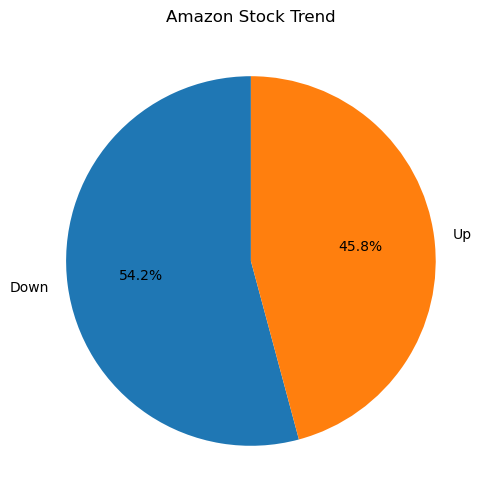

In [50]:
trend_counts = amazon['Trend'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Amazon Stock Trend')
plt.show()

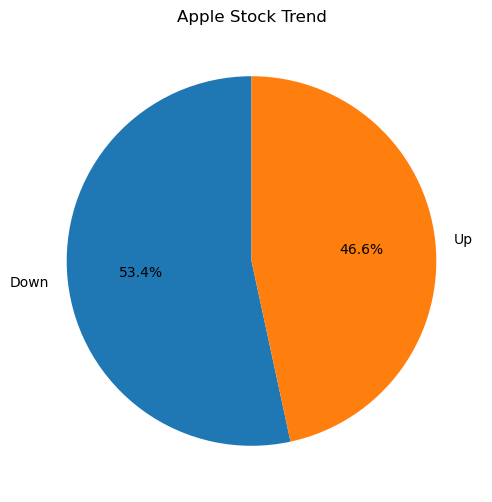

In [51]:
trend_counts = apple['Trend'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Apple Stock Trend')
plt.show()

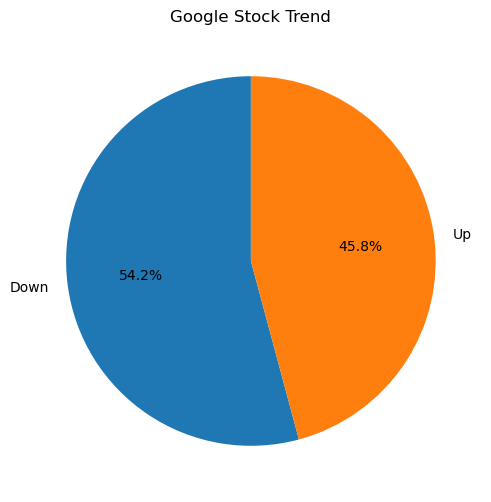

In [52]:
trend_counts = google['Trend'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Google Stock Trend')
plt.show()

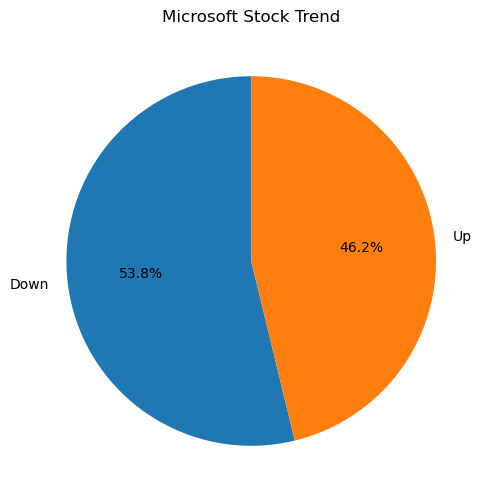

In [53]:
trend_counts = microsoft['Trend'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Microsoft Stock Trend')
plt.show()

# What was the correlation between the daily returns of different stocks?

In [54]:
all_adj = pd.concat([apple['Adj Close'] ,google['Adj Close'],amazon['Adj Close'],microsoft['Adj Close']], axis = 1)
all_adj.columns = ['Apple','Google','Amazon','Microsoft']
daily_returns = all_adj.pct_change()

In [55]:
daily_returns.tail()

,Apple,Google,Amazon,Microsoft
Date,,,,
2022-12-23,-0.002798,0.017562,0.017425,0.002267
2022-12-27,-0.013878,-0.020933,-0.025924,-0.007414
2022-12-28,-0.030685,-0.016718,-0.014692,-0.010255
2022-12-29,0.028324,0.028799,0.028844,0.027630
2022-12-30,0.002469,-0.002473,-0.002138,-0.004937


<Axes: >

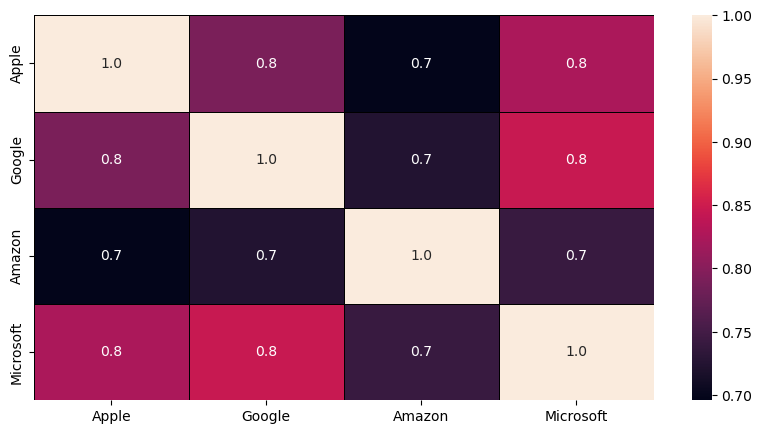

In [56]:
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(daily_returns.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)

After seeing the heatmap we can clearly say that Microsoft having highest correlation with Apple and Google and all correlations are positively correlated.